## Loading Libraries 

In [1]:
# Load the necessary packages and libaries 

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score, classification_report, confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

## Loading Data Set & Preprocessing 

In [2]:
path = "C:/Users/hp/Documents/Smith School of Business/MMA 823- Finance Analytics/Assignment 2/Bankruptcy_data_Final.xlsx"
df= pd.read_excel(path, header=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  92872 non-null  int64  
 1   Tobin's Q           92620 non-null  float64
 2   EPS                 92867 non-null  float64
 3   Liquidity           92625 non-null  float64
 4   Profitability       92625 non-null  float64
 5   Productivity        92625 non-null  float64
 6   Leverage Ratio      92846 non-null  float64
 7   Asset Turnover      92625 non-null  float64
 8   Operational Margin  87315 non-null  float64
 9   Return on Equity    92864 non-null  float64
 10  Market Book Ratio   92815 non-null  float64
 11  Assets Growth       86171 non-null  float64
 12  Sales Growth        86171 non-null  float64
 13  Employee Growth     85862 non-null  float64
 14  BK                  92872 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 10.6 MB


In [4]:
# "Cleaning" the data - replacing/imputing missing data

pd.DataFrame(df).isna().sum() # Lets check if we have any missing data -- the result shows that yes, and a lot

Data Year - Fiscal       0
Tobin's Q              252
EPS                      5
Liquidity              247
Profitability          247
Productivity           247
Leverage Ratio          26
Asset Turnover         247
Operational Margin    5557
Return on Equity         8
Market Book Ratio       57
Assets Growth         6701
Sales Growth          6701
Employee Growth       7010
BK                       0
dtype: int64

## Impute Missing Values 

In [5]:
# "Cleaning" the data - replacing/imputing missing data

# Approach:
# Categorical features: adding new category 'missing_value' (as if this is a new color, or gender)
# Numerical features: replacing with a median (or mean, or most frequent value, etc.) An alternative approach is to imputate, see here: https://scikit-learn.org/stable/modules/impute.html 
# + we add surrogate columns indicating that the value is imputed

# creating surrogates
for col in df:
    if df[col].isna().sum() != 0: 
        df[col + '_surrogate'] = df[col].isna().astype(float)


In [6]:
# fixing numericals 
imputer = SimpleImputer(missing_values = np.nan, strategy='median')
imputer.fit(df.select_dtypes(include=['int64','float64']))
df[df.select_dtypes(include=['int64','float64']).columns] = imputer.transform(df.select_dtypes(include=['int64','float64']))


In [7]:
# Lets examine the result, e.g., datafield "Poverty.Code"
df[['Sales Growth','Sales Growth_surrogate']]

,Sales Growth,Sales Growth_surrogate
0,0.059733,1.0
1,0.014278,0.0
2,0.327909,0.0
3,-0.118904,0.0
4,0.146807,0.0
...,...,...
92867,-0.557483,0.0
92868,-0.010544,0.0
92869,-0.020206,0.0
92870,-0.170928,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92872 entries, 0 to 92871
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Data Year - Fiscal            92872 non-null  float64
 1   Tobin's Q                     92872 non-null  float64
 2   EPS                           92872 non-null  float64
 3   Liquidity                     92872 non-null  float64
 4   Profitability                 92872 non-null  float64
 5   Productivity                  92872 non-null  float64
 6   Leverage Ratio                92872 non-null  float64
 7   Asset Turnover                92872 non-null  float64
 8   Operational Margin            92872 non-null  float64
 9   Return on Equity              92872 non-null  float64
 10  Market Book Ratio             92872 non-null  float64
 11  Assets Growth                 92872 non-null  float64
 12  Sales Growth                  92872 non-null  float64
 13  E

In [9]:
df.head() 

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,...,Profitability_surrogate,Productivity_surrogate,Leverage Ratio_surrogate,Asset Turnover_surrogate,Operational Margin_surrogate,Return on Equity_surrogate,Market Book Ratio_surrogate,Assets Growth_surrogate,Sales Growth_surrogate,Employee Growth_surrogate
0,1979.0,0.98,1.58,0.36,0.18,0.13,1.33,1.77,0.07,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,1980.0,0.98,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1981.0,0.87,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1982.0,1.13,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1983.0,1.26,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
pd.DataFrame(df).isna().sum() 

Data Year - Fiscal              0
Tobin's Q                       0
EPS                             0
Liquidity                       0
Profitability                   0
Productivity                    0
Leverage Ratio                  0
Asset Turnover                  0
Operational Margin              0
Return on Equity                0
Market Book Ratio               0
Assets Growth                   0
Sales Growth                    0
Employee Growth                 0
BK                              0
Tobin's Q_surrogate             0
EPS_surrogate                   0
Liquidity_surrogate             0
Profitability_surrogate         0
Productivity_surrogate          0
Leverage Ratio_surrogate        0
Asset Turnover_surrogate        0
Operational Margin_surrogate    0
Return on Equity_surrogate      0
Market Book Ratio_surrogate     0
Assets Growth_surrogate         0
Sales Growth_surrogate          0
Employee Growth_surrogate       0
dtype: int64

In [11]:
df.shape

(92872, 28)

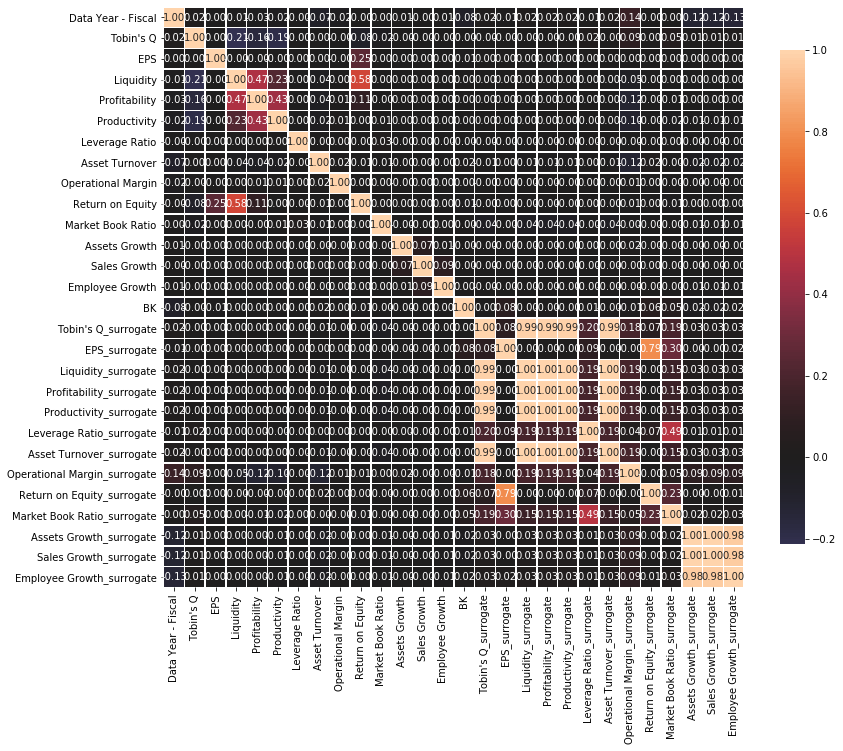

In [51]:
def correlation_heatmap(df):
    correlations = df.corr()

    fig, ax = plt.subplots(figsize=(13,13))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df)

In [12]:
dep_var = ['BK']

#STORE and StoreID have the same information
categorical_vars = ['Data Year - Fiscal']

continuous_vars = ["Tobin's Q",'EPS','Liquidity','Profitability','Productivity','Leverage Ratio','Asset Turnover','Operational Margin','Return on Equity','Market Book Ratio','Assets Growth','Sales Growth','Employee Growth']

## Training-Test Set Split 

In [15]:
X = df[categorical_vars+continuous_vars]
y = df[dep_var]


X_new, X_holdout, y_new, y_holdout = train_test_split(X, y, test_size=0.10, random_state=123,stratify=y)

print(X_new.shape, X_holdout.shape, y_new.shape, y_holdout.shape)

(83584, 14) (9288, 14) (83584, 1) (9288, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=123,stratify=y_new)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(62688, 14) (20896, 14) (62688, 1) (20896, 1)


## Feature Importance via XGB Boost 

In [17]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_new, y_new)
clf_xgb = GradientBoostingClassifier(random_state=0).fit(X_resampled, np.ravel(y_resampled))
feat_imp_xgb = pd.DataFrame(data={'names': X.columns, 'importance': clf_xgb.feature_importances_})
feat_imp_xgb.sort_values(by=['importance'], ascending=False).head()

,names,importance
9,Return on Equity,0.412076
0,Data Year - Fiscal,0.231840
4,Profitability,0.060317
2,EPS,0.056789
10,Market Book Ratio,0.037397


## Modelling- Logestic Regression 

In [18]:
clf = LogisticRegression(random_state=0).fit(X_train, np.ravel(y_train))
predicted = clf.predict(X_test)

AUC = str(round(roc_auc_score(y_test, predicted)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predicted)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predicted)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predicted)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)

AUC:  50.0%
Recall:  0.0%
Precision:  0.0%
Accuracy:  99.4%


Class 0: 92314
Class 1: 558
Proportion: 165.44 : 1


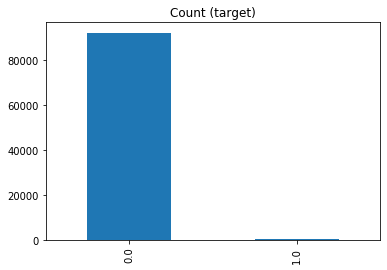

In [19]:
target_count = df.BK.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

## Logistic Regression 

In [20]:
clf = LogisticRegression(random_state=0).fit(X_train, np.ravel(y_train))
predicted = clf.predict(X_test)

AUC = str(round(roc_auc_score(y_test, predicted)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predicted)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predicted)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predicted)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)
results = pd.DataFrame(data={'Model': "LR", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})

AUC:  50.0%
Recall:  0.0%
Precision:  0.0%
Accuracy:  99.4%


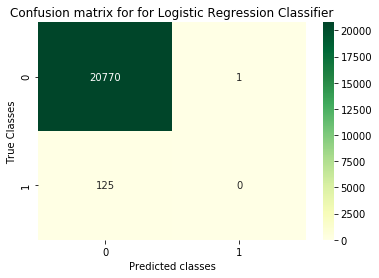

In [21]:
import seaborn as sns
plt.title('Confusion matrix for for Logistic Regression Classifier')
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

## Logistic Regression via SMOTE Sampling 

In [22]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [23]:
clf_sm = LogisticRegression(random_state=0, max_iter=4000).fit(x_train_res, np.ravel(y_train_res))
predicted_sm = clf_sm.predict(X_test)

In [24]:
AUC = str(round(roc_auc_score(y_test, predicted_sm)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predicted_sm)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predicted_sm)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predicted_sm)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)
curr_results = pd.DataFrame(data={'Model': "LR SMOTE", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})

AUC:  64.66%
Recall:  56.8%
Precision:  1.23%
Accuracy:  72.42%


In [25]:
results = results.append(curr_results)

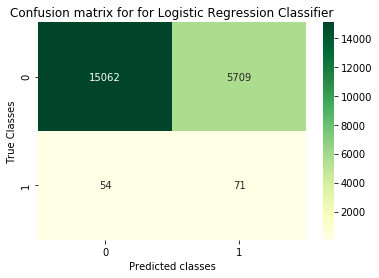

In [26]:
plt.title('Confusion matrix for for Logistic Regression Classifier')
sns.heatmap(confusion_matrix(y_test, predicted_sm), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

## Logistic Regression vis Class Balanced 

In [27]:
clf_bal = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, np.ravel(y_train))
predicted_bal = clf_bal.predict(X_test)
AUC = str(round(roc_auc_score(y_test, predicted_bal)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predicted_bal)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predicted_bal)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predicted_bal)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)

curr_results = pd.DataFrame(data={'Model': "LR Class Weights", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})
results = results.append(curr_results)

AUC:  69.81%
Recall:  44.0%
Precision:  5.69%
Accuracy:  95.31%


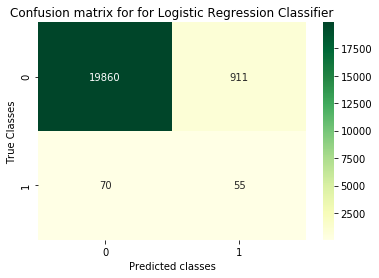

In [28]:
plt.title('Confusion matrix for for Logistic Regression Classifier')
sns.heatmap(confusion_matrix(y_test, predicted_bal), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

In [29]:
train_down = pd.concat([X_train.reset_index(), pd.DataFrame(y_train, columns=['BK'])], axis=1)

In [30]:
count_col=train_down['BK']
pd.concat([count_col.value_counts(), 
                count_col.value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage'))

,counts,percentage
0.0,62311,99.398609
1.0,377,0.601391


## Up-Sampling Technique 

In [31]:
# Reference: https://elitedatascience.com/imbalanced-classes
from sklearn.utils import resample

# Separate majority and minority classes
train_majority = df[df.BK==0.0]
train_minority = df[df.BK==1.0]
 
# Downsample majority class
train_minority_up = resample(train_minority, 
                                 replace=True,    # sample without replacement
                                 n_samples=73852,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
train_upsampled = pd.concat([train_minority_up, train_majority])

In [32]:
Xup = train_upsampled[categorical_vars+continuous_vars]
yup = train_upsampled[dep_var]



In [33]:
print(Xup.shape)
print(yup.shape)

(166166, 14)
(166166, 1)


## Logistic Regression Up Sample 

In [34]:
clf_up = LogisticRegression(random_state=0).fit(Xup, np.ravel(yup))
predict_up = clf_up.predict(X_test)

AUC = str(round(roc_auc_score(y_test, predict_up)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predict_up)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predict_up)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predict_up)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)
curr_results = pd.DataFrame(data={'Model': "LR UP Sampled", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})
results = results.append(curr_results)

AUC:  51.85%
Recall:  4.0%
Precision:  7.35%
Accuracy:  99.12%


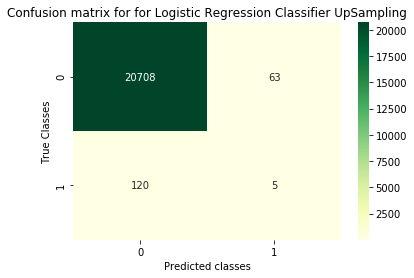

In [59]:
plt.title('Confusion matrix for for Logistic Regression Classifier UpSampling')
sns.heatmap(confusion_matrix(y_test, predict_up), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

## Random Forest 

In [54]:
clf_rf2 = RandomForestClassifier(random_state=0).fit(X_train, np.ravel(y_train))
predict_rf2 = clf_rf2.predict(X_test)
AUC = str(round(roc_auc_score(y_test, predict_rf2)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predict_rf2)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predict_rf2)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predict_rf2)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)
curr_results = pd.DataFrame(data={'Model': "Random Forest", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})
results = results.append(curr_results)

AUC:  50.4%
Recall:  0.8%
Precision:  50.0%
Accuracy:  99.4%


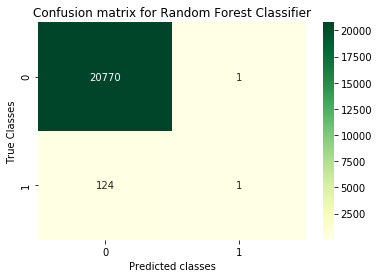

In [57]:
plt.title('Confusion matrix for Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, predict_rf2), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

## Random Forest UP SAMPLE

In [52]:

clf_rf = RandomForestClassifier(max_depth=8, random_state=0).fit(Xup, np.ravel(yup))
predict_rf = clf_rf.predict(X_test)

AUC = str(round(roc_auc_score(y_test, predict_rf)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predict_rf)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predict_rf)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predict_rf)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)
curr_results = pd.DataFrame(data={'Model': "Random Forest UP", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})
results = results.append(curr_results)

AUC:  97.45%
Recall:  99.2%
Precision:  12.18%
Accuracy:  95.72%


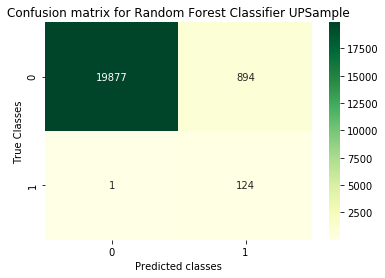

In [55]:
plt.title('Confusion matrix for Random Forest Classifier UPSample')
sns.heatmap(confusion_matrix(y_test, predict_rf), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

## Random Forest Class Weighted 

In [36]:

clf_rf = RandomForestClassifier(max_depth=8, random_state=0, class_weight='balanced').fit(X_new, np.ravel(y_new))
predict_rf = clf_rf.predict(X_test)

AUC = str(round(roc_auc_score(y_test, predict_rf)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predict_rf)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predict_rf)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predict_rf)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)
curr_results = pd.DataFrame(data={'Model': "Random Forest CW", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})
results = results.append(curr_results)

AUC:  97.28%
Recall:  98.4%
Precision:  13.36%
Accuracy:  96.17%


In [68]:
print('Parameters currently in use for rf')
print(clf_rf.get_params())

Parameters currently in use for rf
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


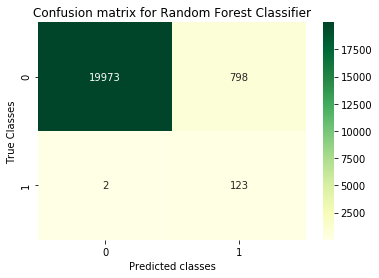

In [38]:
plt.title('Confusion matrix for Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, predict_rf), annot=True, cmap="YlGn",fmt="d")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

## Random Forest without sampling 

## Naive Bayes Upsampling 

In [40]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB().fit(Xup, np.ravel(yup))
predict_nb = clf_nb.predict(X_test)

AUC = str(round(roc_auc_score(y_test, predict_nb)*100, 2)) + "%"
Recall = str(round(recall_score(y_test, predict_nb)*100, 2)) + "%"
Precision = str(round(precision_score(y_test, predict_nb)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_test, predict_nb)*100, 2)) + "%"

print("AUC: ",  AUC)
print("Recall: ",  Recall)
print("Precision: ",  Precision)
print("Accuracy: ",  Accuracy)
curr_results = pd.DataFrame(data={'Model': "Naive Bayes UP", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})
results = results.append(curr_results)

AUC:  52.19%
Recall:  98.4%
Precision:  0.63%
Accuracy:  6.53%


## Results 

In [50]:
results

,Model,AUC,Recall,Precision,Accuracy
0,LR,50.0%,0.0%,0.0%,99.4%
0,LR SMOTE,64.66%,56.8%,1.23%,72.42%
0,LR Class Weights,69.81%,44.0%,5.69%,95.31%
0,LR UP Sampled,51.85%,4.0%,7.35%,99.12%
0,Random Forest UP,97.45%,99.2%,12.18%,95.72%
0,Random Forest CW,97.28%,98.4%,13.36%,96.17%
0,Random Forest,50.4%,0.8%,50.0%,99.4%
0,Naive Bayes UP,52.19%,98.4%,0.63%,6.53%


## Hyperparameter Tuning 

## Random Forest 

In [60]:
param_grid = {'n_estimators': [100, 200, 300,400,500]
               ,'min_samples_split': [1, 2, 4]
              }

scoring = {'AUC': 'roc_auc', 'Accuracy': 'accuracy', 'Recall': 'recall', 'Precision': 'precision'}

#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

In [61]:
#https://stackoverflow.com/questions/52196422/finding-accuracy-precision-and-recall-of-a-model-after-hyperparameter-tuning-in
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(max_depth=8, random_state=0, class_weight='balanced'), 
                               param_grid=param_grid,
                               scoring=scoring, refit='AUC',
                               cv=5)
# last, we fit our data. This will take a while...
grid_search_rf.fit(X=X_new, y=np.ravel(y_new))

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=8, random_state=0),
             param_grid={'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             refit='AUC',
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Precision': 'precision', 'Recall': 'recall'})

In [62]:
AUC = str(round(grid_search_rf.best_score_*100, 2)) + "%"
Recall = str(round(grid_search_rf.cv_results_['mean_test_Recall'][grid_search_rf.cv_results_['params'].index(grid_search_rf.best_params_)]*100, 2)) + "%"
Precision = str(round(grid_search_rf.cv_results_['mean_test_Precision'][grid_search_rf.cv_results_['params'].index(grid_search_rf.best_params_)]*100, 2)) + "%"
Accuracy = str(round(grid_search_rf.cv_results_['mean_test_Accuracy'][grid_search_rf.cv_results_['params'].index(grid_search_rf.best_params_)]*100, 2)) + "%"
res_grid = pd.DataFrame(data={'Model': "Random Forest", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})

## Logistic Regression 

In [66]:
print('Parameters currently in use for lr:\n')
print(clf_bal.get_params())

param_grid = {'C': [0.1, 1, 10] }
#param_grid = {'C': [1, 10, 100]}

#https://stackoverflow.com/questions/52196422/finding-accuracy-precision-and-recall-of-a-model-after-hyperparameter-tuning-in
grid_search_lr = GridSearchCV(estimator=LogisticRegression(random_state=0, max_iter=1000, class_weight='balanced'), 
                              param_grid=param_grid,
                              scoring=scoring, refit='AUC',
                              cv=5)
# last, we fit our data. This will take a while...
grid_search_lr.fit(X=X_new, y=np.ravel(y_new))

AUC = str(round(grid_search_lr.best_score_*100, 2)) + "%"
Recall = str(round(grid_search_lr.cv_results_['mean_test_Recall'][grid_search_lr.cv_results_['params'].index(grid_search_lr.best_params_)]*100, 2)) + "%"
Precision = str(round(grid_search_lr.cv_results_['mean_test_Precision'][grid_search_lr.cv_results_['params'].index(grid_search_lr.best_params_)]*100, 2)) + "%"
Accuracy = str(round(grid_search_lr.cv_results_['mean_test_Accuracy'][grid_search_lr.cv_results_['params'].index(grid_search_lr.best_params_)]*100, 2)) + "%"
curr_res_grid = pd.DataFrame(data={'Model': "Logistic Regression", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})

res_grid = res_grid.append(curr_res_grid)

Parameters currently in use for lr:

{'C': 1.0, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [67]:
res_grid

,Model,AUC,Recall,Precision,Accuracy
0,Random Forest,94.42%,65.94%,11.06%,96.57%
0,Logistic Regression,67.36%,57.98%,1.11%,68.88%


## Performance on Holdout Set 

## Random Forest 

In [47]:
predict_rf = grid_search_rf.predict(X_holdout)
AUC = str(round(roc_auc_score(y_holdout, predict_rf)*100, 2)) + "%"
Recall = str(round(recall_score(y_holdout, predict_rf)*100, 2)) + "%"
Precision = str(round(precision_score(y_holdout, predict_rf)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_holdout, predict_rf)*100, 2)) + "%"
res_ho = pd.DataFrame(data={'Model': "Random Forest", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})

In [48]:
predict_lr = grid_search_lr.predict(X_holdout)
AUC = str(round(roc_auc_score(y_holdout, predict_lr)*100, 2)) + "%"
Recall = str(round(recall_score(y_holdout, predict_lr)*100, 2)) + "%"
Precision = str(round(precision_score(y_holdout, predict_lr)*100, 2)) + "%"
Accuracy = str(round(accuracy_score(y_holdout, predict_lr)*100, 2)) + "%"
curr_res_ho = pd.DataFrame(data={'Model': "Logistic Regression", 'AUC': [AUC], 'Recall': [Recall], 'Precision': [Precision], 'Accuracy': [Accuracy]})

res_ho = res_ho.append(curr_res_ho)

In [64]:
res_ho

,Model,AUC,Recall,Precision,Accuracy
0,Random Forest,80.2%,64.29%,9.14%,95.93%
0,Logistic Regression,65.53%,62.5%,1.19%,68.52%
